# Exercise 12.1

### Goal:

Create a Deep Neural Network to recognize handwritten digits (0-9), obtained from the MNIST dataset.

Such images are made of 28x28 pixels, each of which takes a color in a scale of grey with values in the range (0,255).

In [34]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

#### Step 1: Load and Process the Data

We import the `mnist` module and use the `load_data()` class, thus creating the training and test data sets.

Once we have loaded the data, we need to format it in the correct shape.

In [35]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# (X are data images, Y are labels)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


In order to be able to use categorical_crossentropy, we need to convert the format of the labels from class vector (integers) to binary class matrix.

In [36]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

We now reshape the data accordingly.

X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


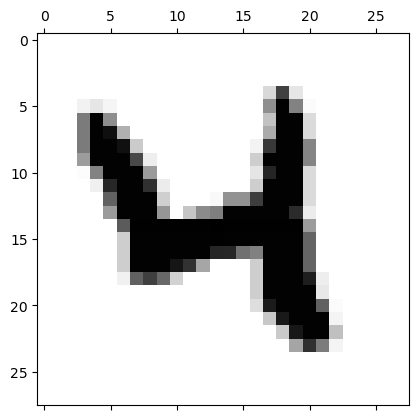

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [37]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]   In modo che siano float tra 0 e 1 intesi come scala di grigi.
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

#### Step 2: Define the Neural Net and its Architecture

We will use Dense for deep layers.

We have to make sure that the numbers of input and output neurons for each layer match. Therefore, we specify the shape of the input in the first layer of the model explicitly using the optional argument `input_shape=(N_features,)`. The sequential construction of the model then allows Keras to infer the correct input/output dimensions of all hidden layers automatically. Hence, we only need to specify the size of the softmax output layer to match the number of categories.

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))  # softmax rende vettore -> probabilità:
    # ogni valore x viene convertito in probabilità e^x/(Sum e^x)
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


#### Step 3: Choose the Optimizer and the Cost Function

Next, we choose the loss function according to which to train the DNN. For classification problems, the function of choice is cross entropy, and since the output data was cast in categorical form, we choose the `categorical_crossentropy` defined in Keras' `losses` module. 

To optimize the weights of the net, we can choose between some built-in optimizers under Keras' `optimizers` module.
Here we chose SGD.

While the loss function and the optimizer are essential for the training procedure, to test the performance of the model one may want to look at a particular `metric` of performance. For instance, in categorical tasks one typically looks at their `accuracy`, which is defined as the percentage of correctly classified data points.

In [54]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

opt=SGD()
def compile_model(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


#### Step 4: Train the model

We train our DNN in minibatches. 

Shuffling the training data during training improves stability of the model. Thus, we train over a number of training epochs. Each epoch corresponds to using **all the train data** divided in minibatches.

Training the DNN is a one-liner using the `fit()` method of the `Sequential` class. The first two required arguments are the training input and output data. As optional arguments, we specify the mini-`batch_size`, the number of training `epochs`, and the test or `validation_data`. To monitor the training procedure for every epoch, we set `verbose=True`. 

In [56]:
# training parameters
batch_size = 32
epochs = 20   # ovviamente da aumentare ! (magari 50)

# create the deep neural net
model_DNN = compile_model(opt)

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20


2024-11-04 19:14:02.815207: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.6375 - loss: 1.1780 - val_acc: 0.9088 - val_loss: 0.3236
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8814 - loss: 0.4192 - val_acc: 0.9297 - val_loss: 0.2440
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9070 - loss: 0.3305 - val_acc: 0.9377 - val_loss: 0.2065
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9217 - loss: 0.2799 - val_acc: 0.9467 - val_loss: 0.1795
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9326 - loss: 0.2430 - val_acc: 0.9522 - val_loss: 0.1614
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9381 - loss: 0.2193 - val_acc: 0.9553 - val_loss: 0.1459
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9440 - loss: 0.1999 - val_acc: 0.9598 - val_loss: 0.1359
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9486 - loss: 0.1807 - val_acc: 0.9615 - val_loss: 0.1252
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/st

#### Step 5: Evaluate the Model Performance on the *Unseen* Test Data

Next, we evaluate the model and read of the loss on the test data, and its accuracy using the `evaluate()` method.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.9730 - loss: 0.0889

Test loss: 0.0765526071190834
Test accuracy: 0.9764999747276306


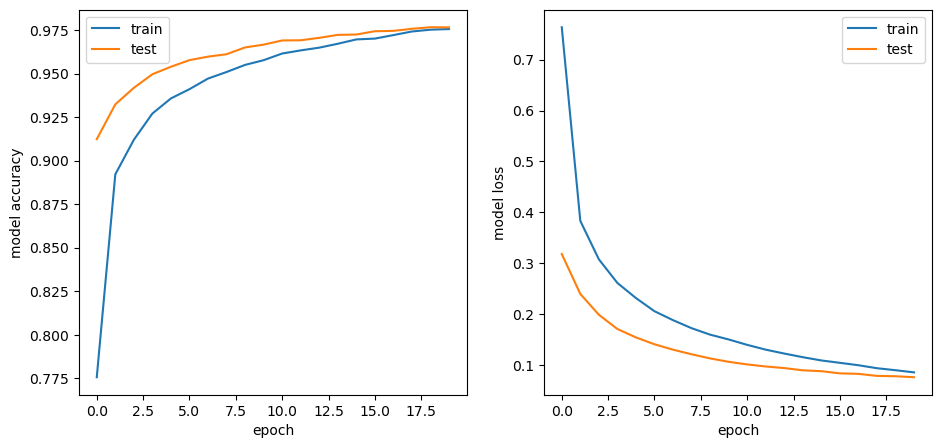

In [53]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.figure(figsize = (11,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.show()

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 784)


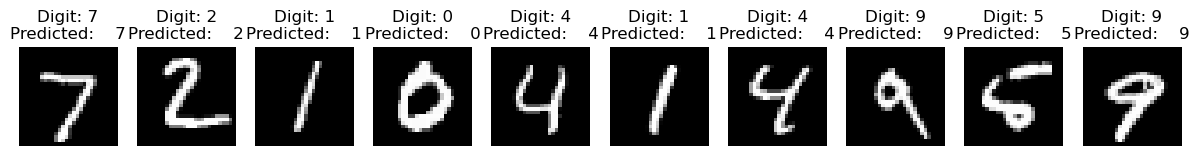

In [13]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)
print(X_test.shape)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## Comparing optimizers

We now evaluate and compare the performances of a few different built-in optimizers: SGD, Adam, Nadam, Adagrad.

2024-11-04 19:32:48.693618: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


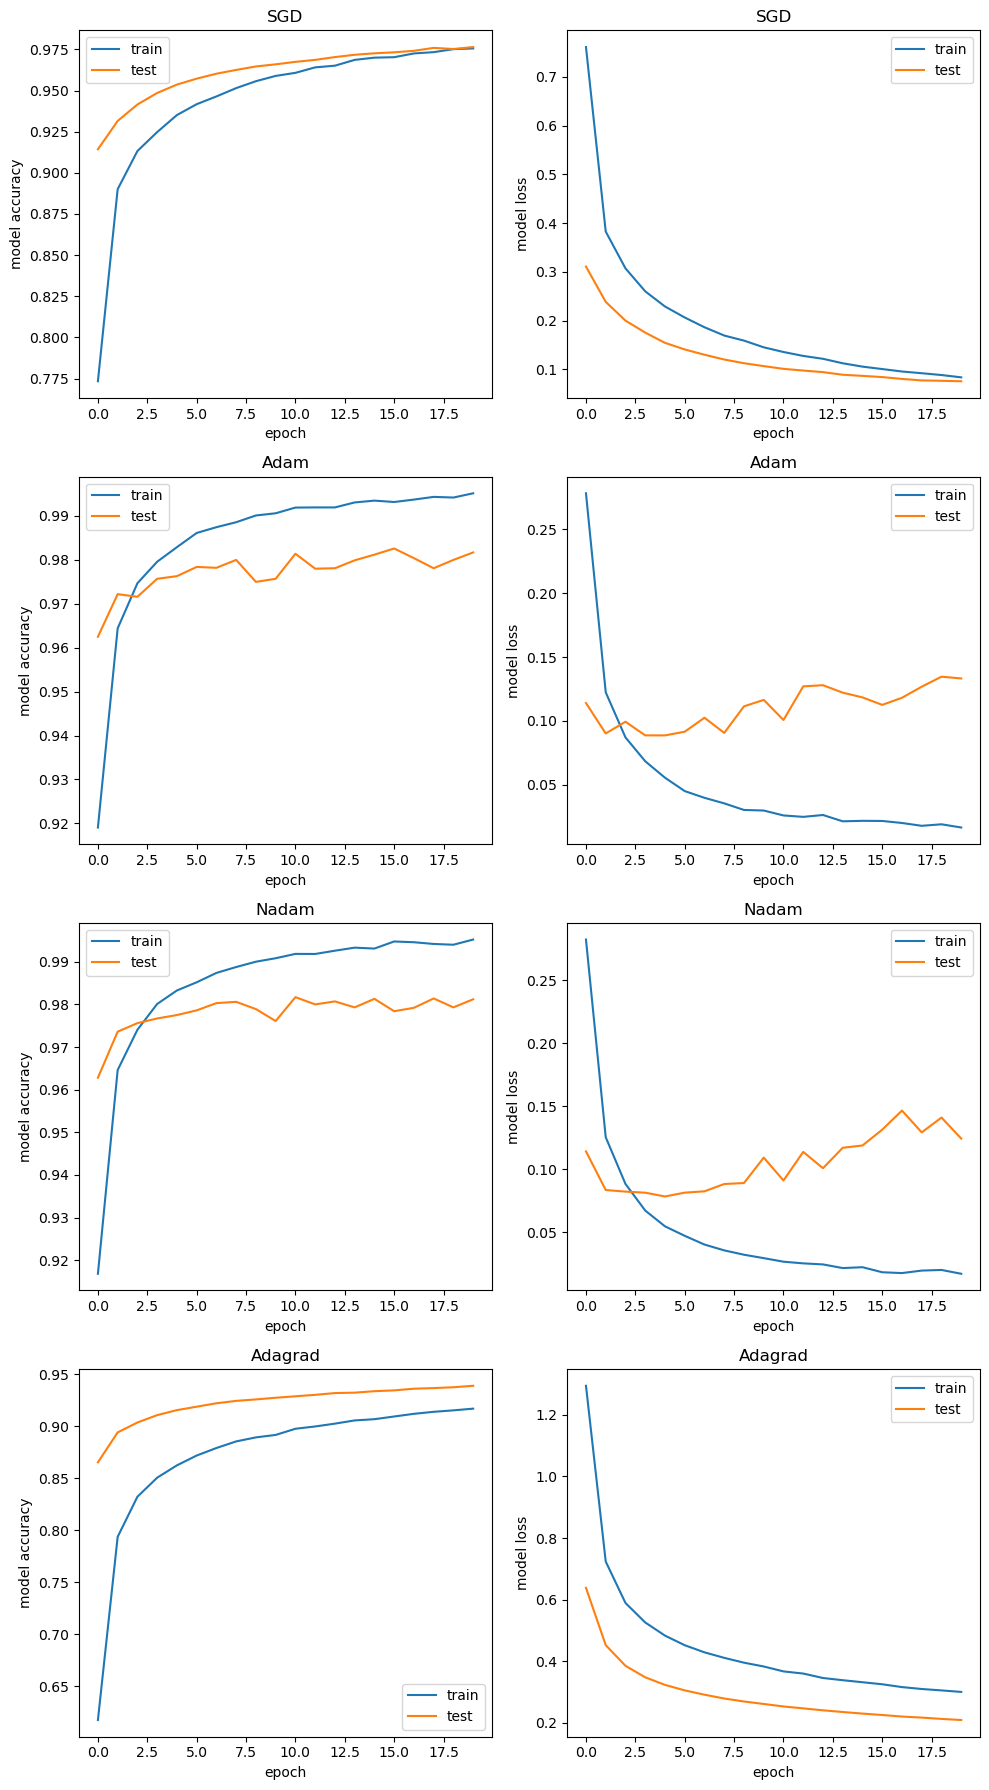

In [58]:
batch_size = 32
epochs = 20
fig, axs = plt.subplots(4, 2, sharey=False, tight_layout=True, figsize=(10, 18))

optimizers=[SGD(), Adam(), Nadam(), Adagrad()]
label=['SGD', 'Adam', 'Nadam', 'Adagrad']

for i in range(4):
    # create the deep neural net
    model_DNN = compile_model(optimizers[i])

    # train DNN and store training info in history
    history = model_DNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X_test, Y_test))
    
    # evaluate, plot accuracy and loss
    score = model_DNN.evaluate(X_test, Y_test, verbose=0)
    
    # summarize history for accuracy
    axs[i,0].plot(history.history['acc'])
    axs[i,0].plot(history.history['val_acc'])
    axs[i,0].set_ylabel('model accuracy')
    axs[i,0].set_xlabel('epoch')
    axs[i,0].legend(['train', 'test'], loc='best')
    axs[i,0].set_title(label[i])

    # summarize history for loss
    axs[i,1].plot(history.history['loss'])
    axs[i,1].plot(history.history['val_loss'])
    axs[i,1].set_ylabel('model loss')
    axs[i,1].set_xlabel('epoch')
    axs[i,1].legend(['train', 'test'], loc='best')
    axs[i,1].set_title(label[i])

plt.show()

From these plots we can observe how an overfitting issue arises using the Adam and Nadam optimizers, as we can see that, while the accuracy on training data increases (quickly), the accuracy on test data does not, and the loss on test data actually increases.

Adagrad reaches high accuracy faster (using less epochs) than SGD, but on the long run SGD obtains better performances.